In [2]:
import umap.umap_ as umap
import os
import numpy as np
from scipy.stats import ks_2samp, bootstrap
from scipy.stats import wasserstein_distance
from sklearn.utils import resample
from scipy.spatial.distance import cosine
import umap.umap_ as umap
import pandas as pd
import os
import numpy as np
import random
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from scipy.stats import wasserstein_distance
from sklearn.metrics import adjusted_rand_score, silhouette_score
from sklearn.metrics.pairwise import rbf_kernel, pairwise_distances
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering
import re

c:\Users\m139105\Documents\phd\uni\.conda\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


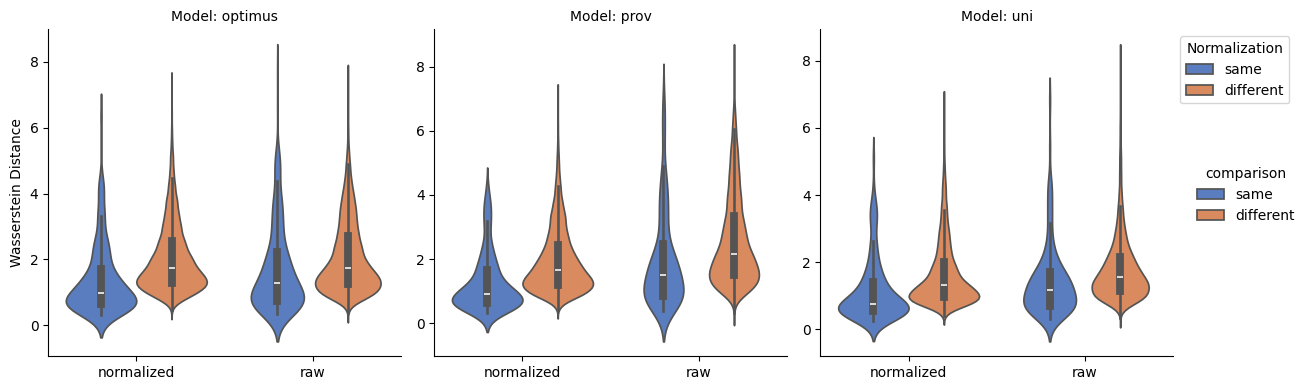

In [3]:

df = pd.read_csv("wsi_features/distances_pairwise/all_models_pairwise.csv")

df = df[df["sample1"] != df["sample2"]]


def extract_prefix(sample):
    match = re.match(r"(s_\d+)", sample)
    return match.group(1) if match else sample

df["sample1_prefix"] = df["sample1"].apply(extract_prefix)
df["sample2_prefix"] = df["sample2"].apply(extract_prefix)

df["comparison"] = df.apply(
    lambda row: "same" if row["sample1_prefix"] == row["sample2_prefix"] else "different",
    axis=1
)

g = sns.catplot(
    data=df,
    x="type",
    y="wasserstein",
    hue="comparison",
    col="model",
    kind="violin",
    inner="box",
    palette="muted",
    height=4,
    sharey=False
)

g.set_axis_labels("", "Wasserstein Distance")
g.set_titles("Model: {col_name}")
plt.legend(title="Normalization", loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.savefig("wasserstein_pre_post_norm.png", dpi=300)



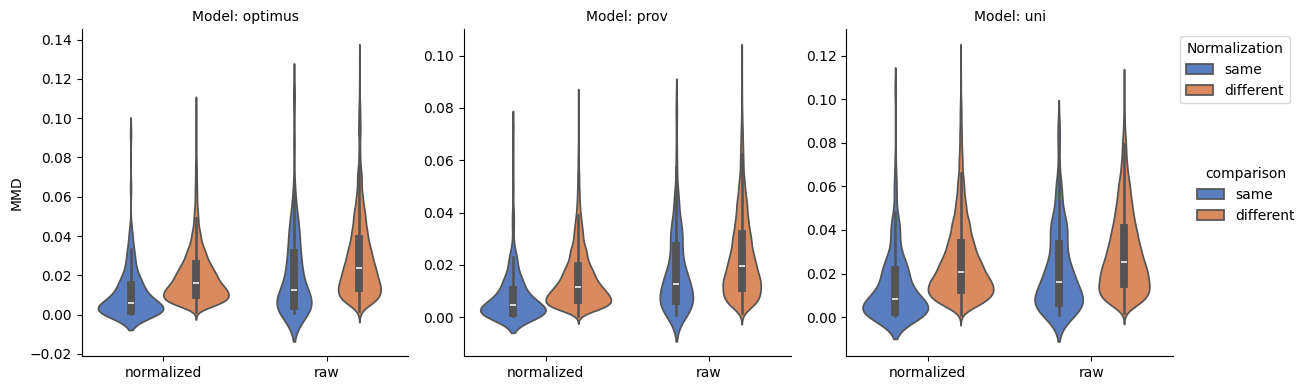

In [4]:
g = sns.catplot(
    data=df,
    x="type",
    y="mmd",
    hue="comparison",
    col="model",
    kind="violin",
    inner="box",
    palette="muted",
    height=4,
    sharey=False
)

g.set_axis_labels("", "MMD")
g.set_titles("Model: {col_name}")
plt.legend(title="Normalization", loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.savefig("mmd_pre_post_norm.png", dpi=300)